<a href="https://colab.research.google.com/github/databyhuseyn/DataAnalysis/blob/main/Bike_Sharing_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d hmavrodiev/london-bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
License(s): other
  0% 0.00/165k [00:00<?, ?B/s]
100% 165k/165k [00:00<00:00, 70.4MB/s]


In [2]:
!unzip /content/london-bike-sharing-dataset.zip

Archive:  /content/london-bike-sharing-dataset.zip
  inflating: london_merged.csv       


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/london_merged.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [5]:
df.isna().sum()

,0
timestamp,0
cnt,0
t1,0
t2,0
hum,0
wind_speed,0
weather_code,0
is_holiday,0
is_weekend,0
season,0


In [6]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

In [9]:
df.timestamp = pd.to_datetime(df.timestamp)

In [10]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

In [11]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,22


In [12]:
df.month.value_counts()

,count
month,
5,1488
1,1487
8,1484
12,1484
7,1481
10,1479
3,1468
4,1438
11,1430


### Let's find out which year is our most successful year

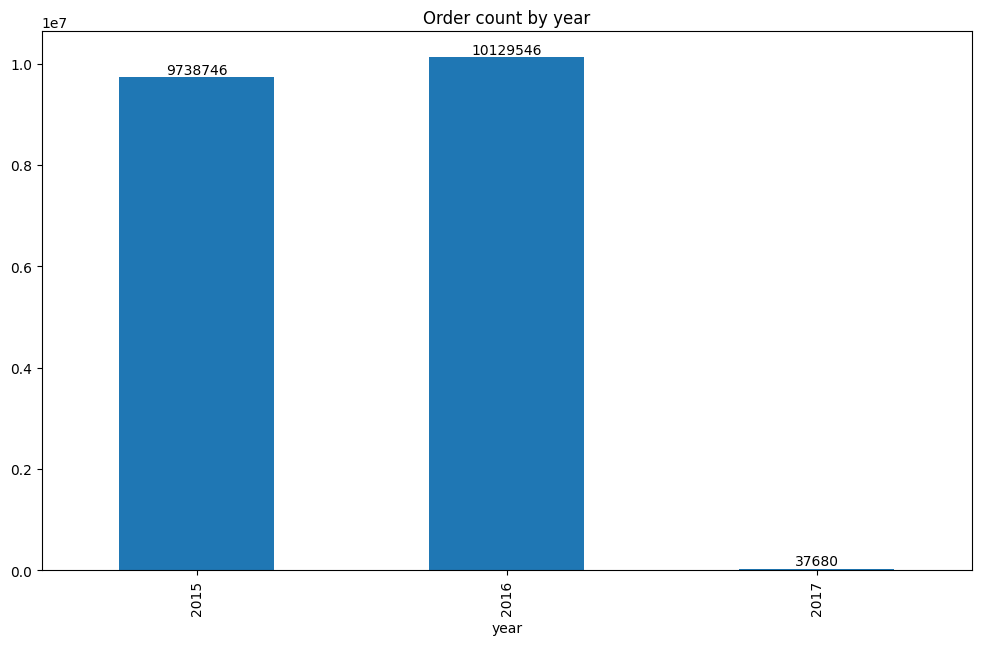

In [13]:
plt.subplots(figsize=(12, 7))
ax = df.groupby(by=df.year)['cnt'].sum().plot(kind='bar')
plt.title('Order count by year')
ax.bar_label(container=ax.containers[0], labels=df.groupby(by=df.year)['cnt'].sum())
plt.show()

In [14]:
df.timestamp.max()

Timestamp('2017-01-03 23:00:00')

Since we don't have data after 2017-01-03 23:00:00, it may seem less

### Which month is most profitable?

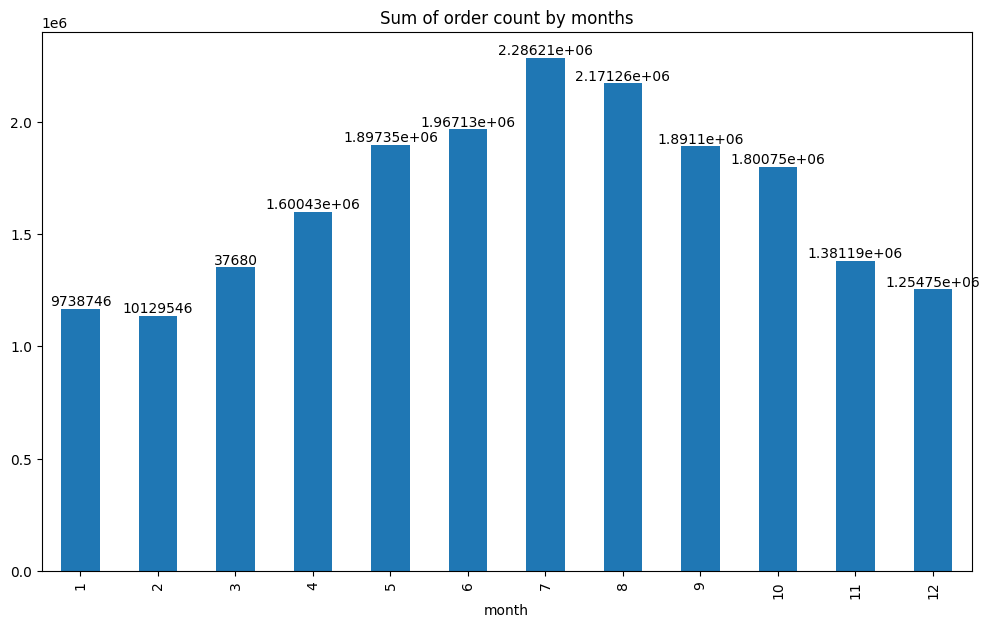

In [15]:
plt.subplots(figsize=(12, 7))
ax = df.groupby(by=df.month)['cnt'].sum().plot(kind='bar')
plt.title('Sum of order count by months')
ax.bar_label(container=ax.containers[0], labels=df.groupby(by=df.year)['cnt'].sum())
plt.show()

According to the data, July is most profitable month. We can say that, people prefer ride bikes in Summer.

### Does days of month play role in sales?

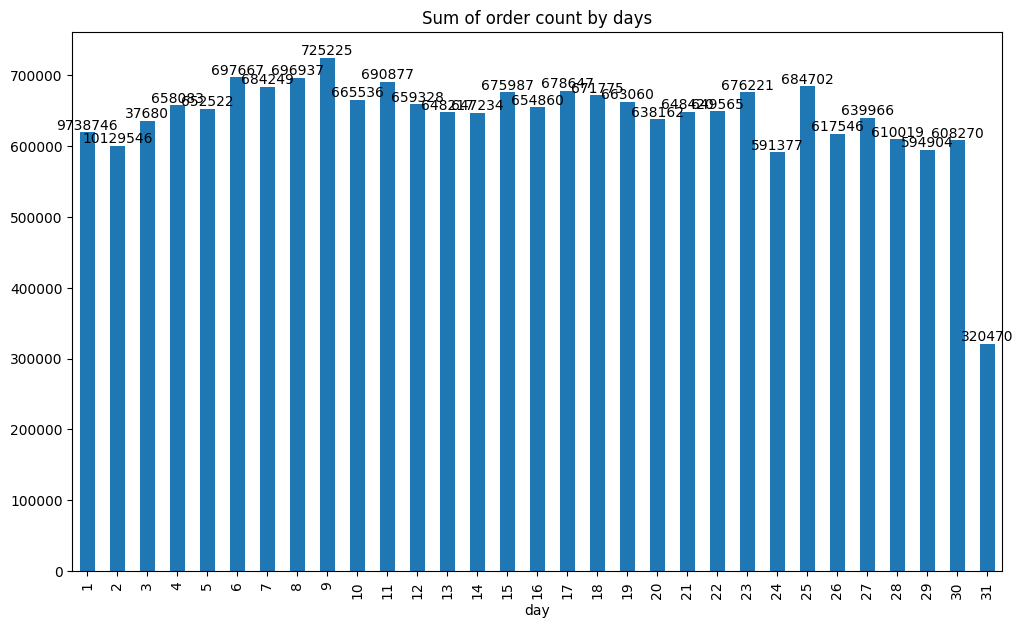

In [16]:
plt.subplots(figsize=(12, 7))
ax = df.groupby(by=df.day)['cnt'].sum().plot(kind='bar')
plt.title('Sum of order count by days')
ax.bar_label(container=ax.containers[0], labels=df.groupby(by=df.year)['cnt'].sum())
plt.show()

As we can see, data is almost uniformly distributed. So it means, days of the month doesn't play any crucial role in sales.

### Does rush-hours have any impact on our sales?

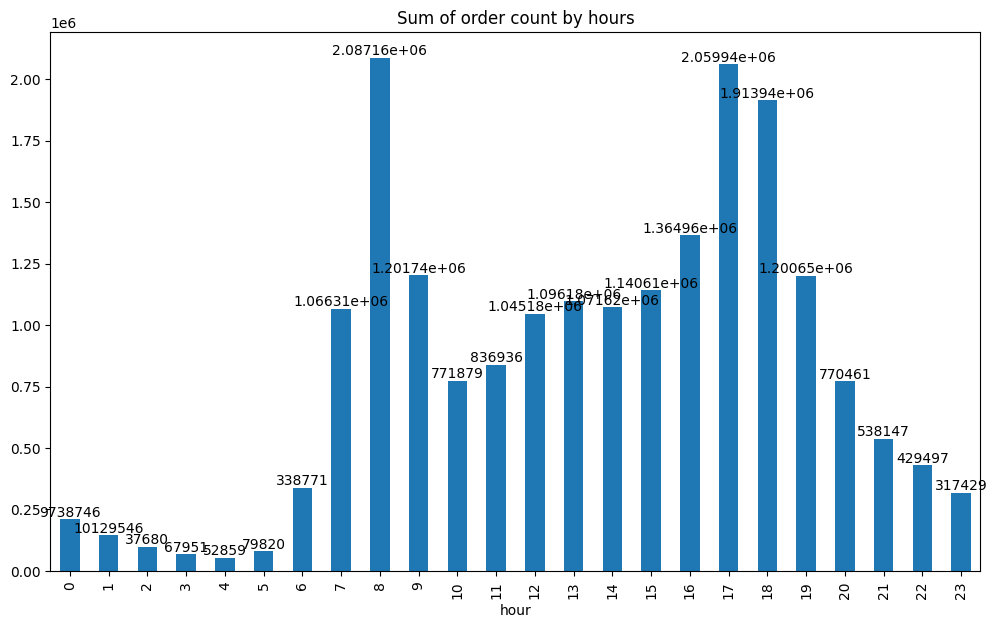

In [17]:
plt.subplots(figsize=(12, 7))
ax = df.groupby(by=df.hour)['cnt'].sum().plot(kind='bar')
plt.title('Sum of order count by hours')
ax.bar_label(container=ax.containers[0], labels=df.groupby(by=df.year)['cnt'].sum())
plt.show()

As shown in graphic above

* 08 : 00
* 09 : 00
* 16 : 00
* 17 : 00
* 18 : 00

are hours, when our bikes are rented mostly

### How does our sales change based on weekdays or weekends

In [18]:
weekday = df[df['is_weekend'] == 0]
weekend = df[df['is_weekend'] == 1]

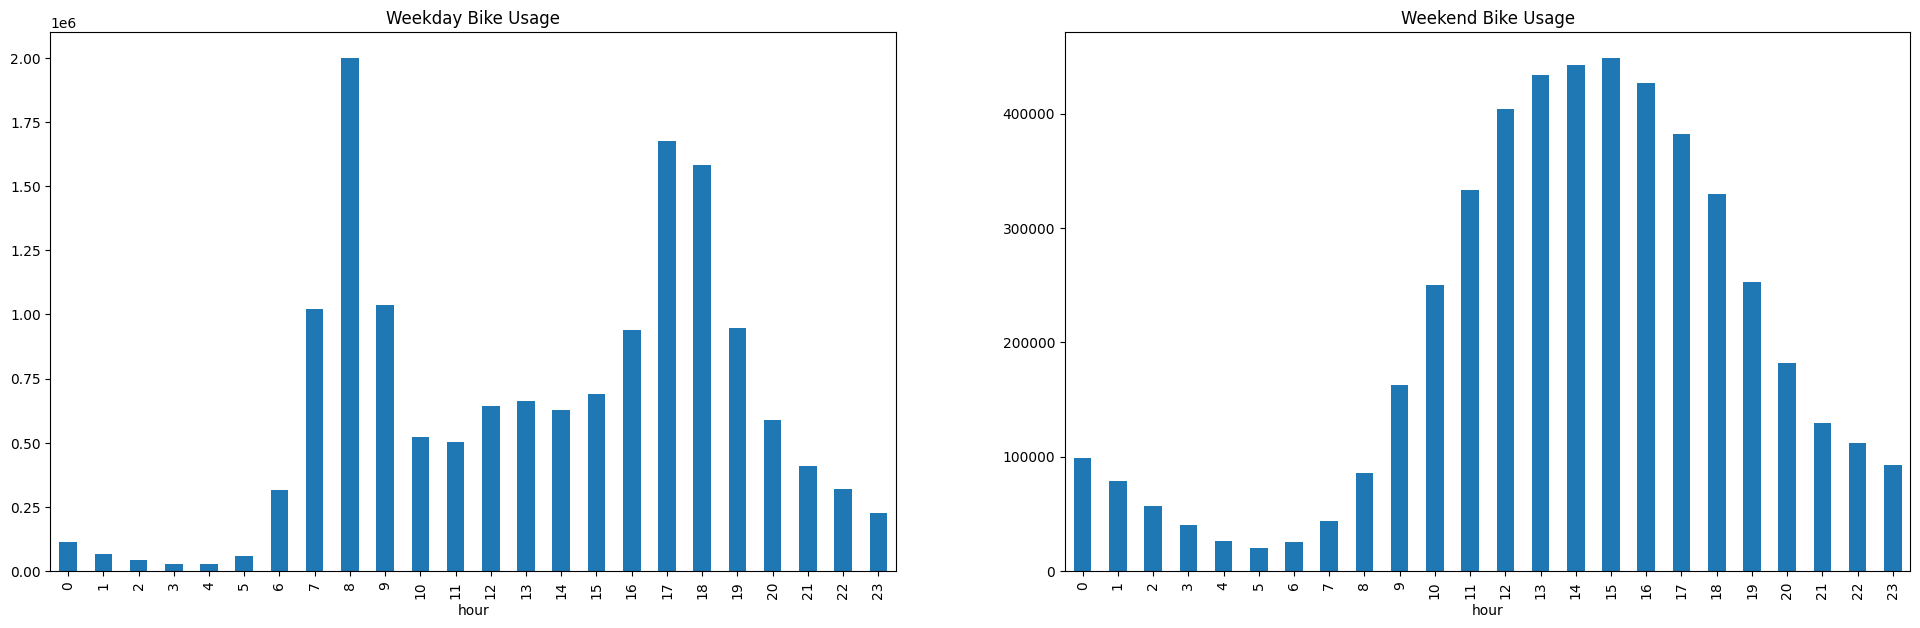

In [23]:
plt.figure(figsize = (24, 7))
plt.subplot(121)
plt.title('Weekday Bike Usage')
weekday.groupby(by=['hour'])['cnt'].sum().plot(kind='bar')
plt.subplot(122)
plt.title('Weekend Bike Usage')
weekend.groupby(by=['hour'])['cnt'].sum().plot(kind='bar')
plt.show()

On weekdays people use bikes at rush-hours, but at the weekends people use bikes for leisure time activities.

### Let's see what is the impact of seasons on our sales

In [24]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,22


In [68]:
df.season.value_counts().reset_index()

,season,count
0,0.0,4394
1,1.0,4387
2,3.0,4330
3,2.0,4303


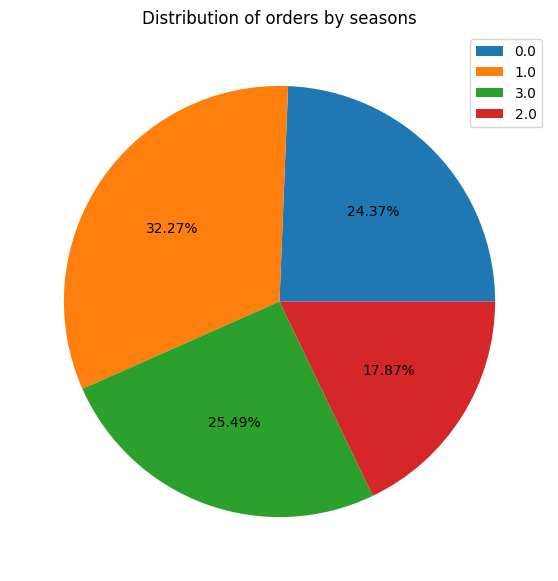

In [69]:
plt.figure(figsize=(7, 7))
plt.title('Distribution of orders by seasons')
plt.pie(df.groupby(by=df.season)['cnt'].sum(), autopct='%1.2f%%')
plt.legend(df.season.value_counts().reset_index()['season'])
plt.show()

### Does temperature affect our sales?

In [45]:
df.t1.value_counts().reset_index().sort_values(by='t1')

,t2,count
80,-6.0,1
78,-5.5,1
79,-5.0,1
71,-4.5,4
66,-4.0,7
...,...,...
69,32.0,7
72,32.5,3
77,33.0,2
73,33.5,3


In [58]:
df['t1_cut'] = pd.cut(df['t1'], bins=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])
df['t2_cut'] = pd.cut(df['t2'], bins=[-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40])

In [59]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour,t1_cut,t2_cut
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,"(0, 5]","(0, 5]"
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,"(0, 5]","(0, 5]"
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,"(0, 5]","(0, 5]"
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,"(0, 5]","(0, 5]"
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,"(0, 5]","(-5, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,3,19,"(0, 5]","(0, 5]"
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,3,20,"(0, 5]","(0, 5]"
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,3,21,"(5, 10]","(0, 5]"
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,3,22,"(5, 10]","(0, 5]"


<ipython-input-60-2ed22e92f69d>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=df.t1_cut)['cnt'].sum().plot(kind='bar')
<ipython-input-60-2ed22e92f69d>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by=df.t2_cut)['cnt'].sum().plot(kind='bar')


<Axes: title={'center': 'Usage of bikes based on feelslike temperature'}, xlabel='t2_cut'>

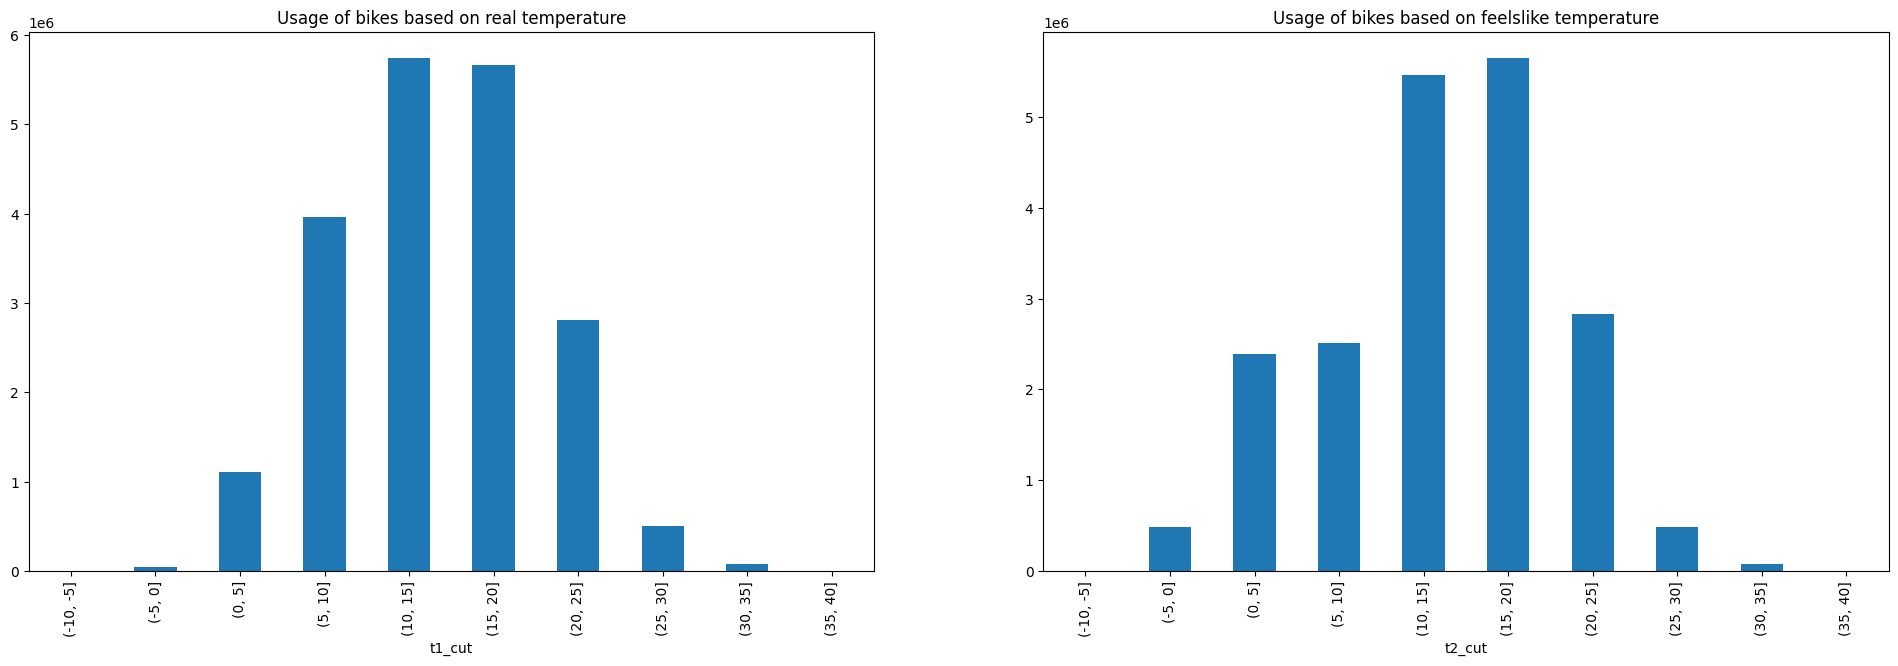

In [60]:
plt.figure(figsize=(24, 7))
plt.subplot(121)
plt.title('Usage of bikes based on real temperature')
df.groupby(by=df.t1_cut)['cnt'].sum().plot(kind='bar')
plt.subplot(122)
plt.title('Usage of bikes based on feelslike temperature')
df.groupby(by=df.t2_cut)['cnt'].sum().plot(kind='bar')

As we can see, mild temperatures have good impact on our sales

### Does our sales affected by holidays?

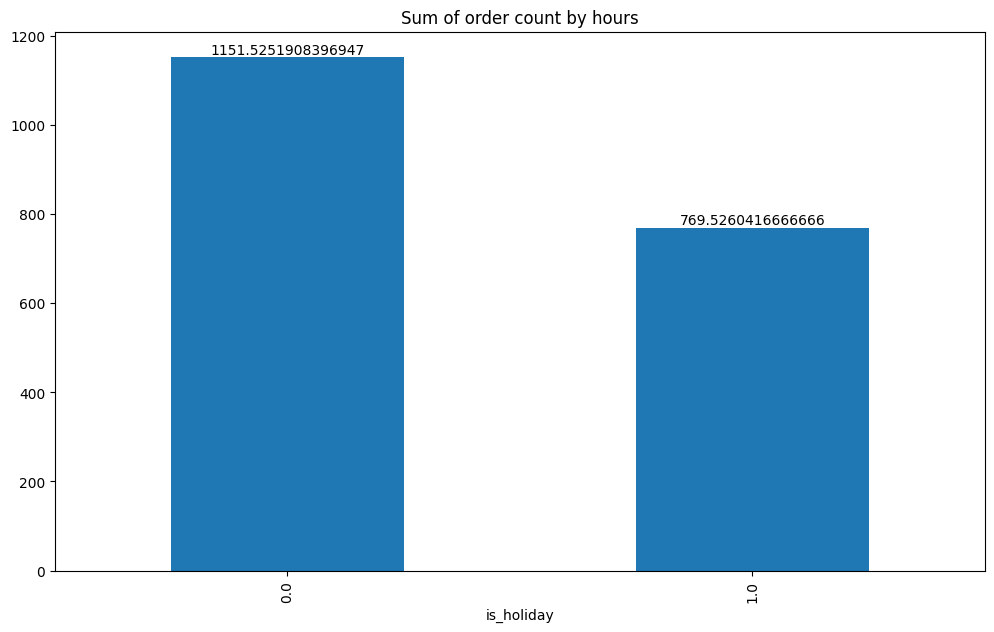

In [81]:
plt.subplots(figsize=(12, 7))
ax = df.groupby(by=['is_holiday'])['cnt'].mean().plot(kind='bar')
plt.title('Sum of order count by hours')
ax.bar_label(container=ax.containers[0], labels=df.groupby(by=['is_holiday'])['cnt'].mean())
plt.show()

Since we used average, we can say that on holidays people use bikes less than normal days